<a href="https://colab.research.google.com/github/Rawan2266/Prodigy-InfoTech/blob/main/Task_3_predigy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
df1=pd.read_csv('twitter_training.csv', lineterminator='\n')
df2=pd.read_csv('twitter_validation.csv', lineterminator='\n')

In [5]:
df1.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,\r"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   2401                                                    74681 non-null  int64 
 1   Borderlands                                             74681 non-null  object
 2   Positive                                                74681 non-null  object
  74681 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
df2.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣\r"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                               --------------  ----- 
 0   3364                                                                                                                                                                                                                                                 999 non-null    int64 
 1   Facebook                                                                

In [12]:
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|\#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
df1["cleaned_text"] = df1["im getting on borderlands and i will murder you all ,\r"].astype(str).apply(clean_text)

In [18]:
df1.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,\r",cleaned_text,sentiment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill,Neutral
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill,Neutral
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderland murder,Neutral
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland murder,Neutral
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderland murder,Neutral


In [20]:
df2["cleaned_text"] = df2["I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣\r"].astype(str).apply(clean_text)
display(df2.head())

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣\r",cleaned_text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon bos jeff bezos reject claim co...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,pay word function poorly chromebook
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping american face really commit...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi ive madeleine mccann cellar past year littl...


In [22]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df1["sentiment"] = df1["cleaned_text"].apply(get_sentiment)
df1["sentiment"].value_counts()


,count
sentiment,
Positive,32656
Negative,21548
Neutral,20477


In [21]:
df2.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣\r",cleaned_text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon bos jeff bezos reject claim co...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,pay word function poorly chromebook
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping american face really commit...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi ive madeleine mccann cellar past year littl...


In [23]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df2["sentiment"] = df2["cleaned_text"].apply(get_sentiment)
df2["sentiment"].value_counts()


,count
sentiment,
Positive,459
Negative,333
Neutral,207


/tmp/ipython-input-1511897933.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df1, palette="pink")


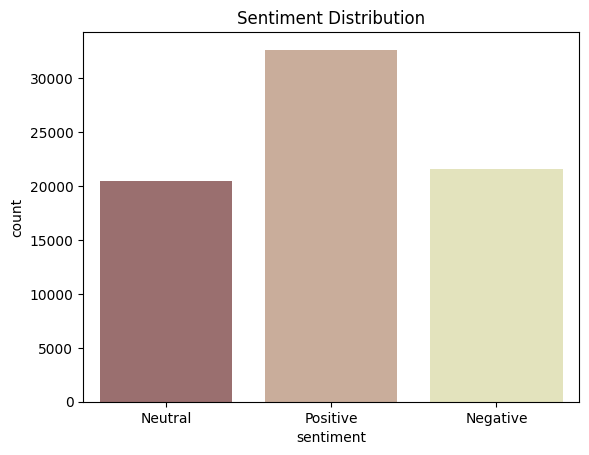

In [28]:
sns.countplot(x="sentiment", data=df1, palette="pink")
plt.title("Sentiment Distribution")
plt.show()

/tmp/ipython-input-2945865224.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df2, palette="pink")


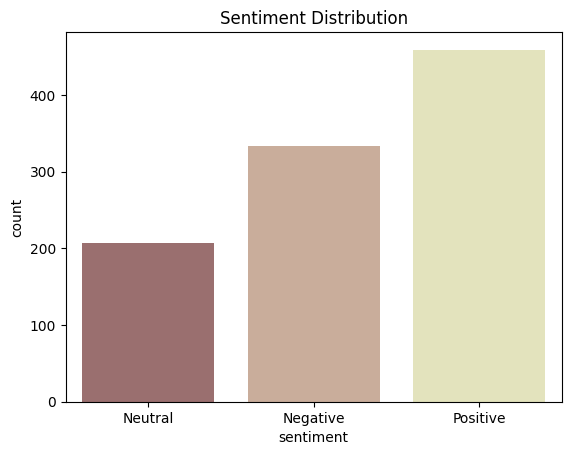

In [29]:
sns.countplot(x="sentiment", data=df2, palette="pink")
plt.title("Sentiment Distribution")
plt.show()

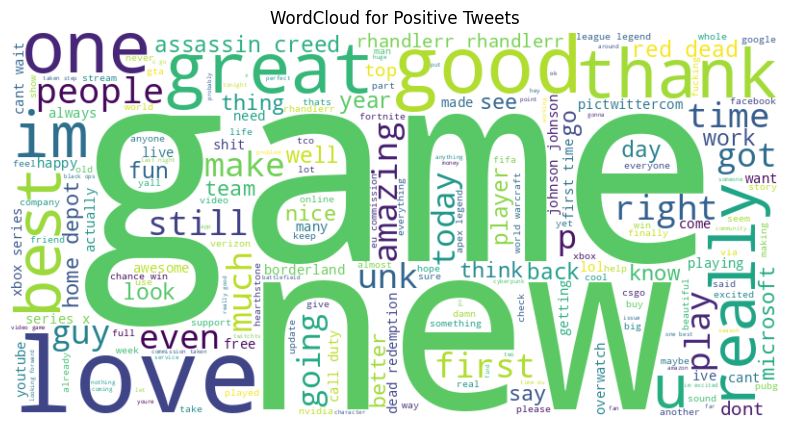

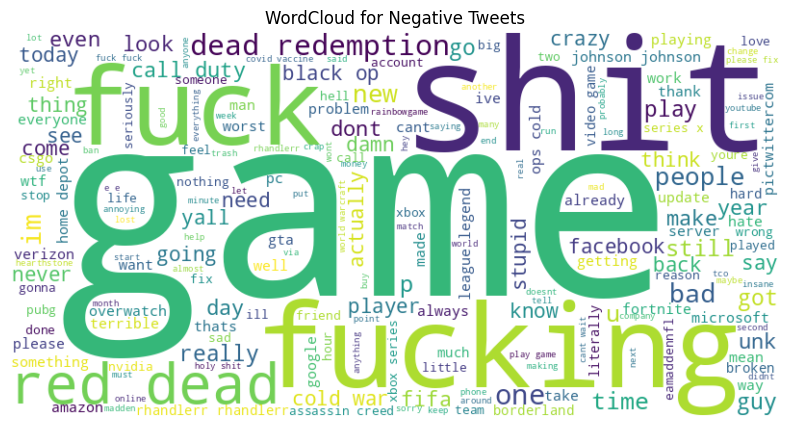

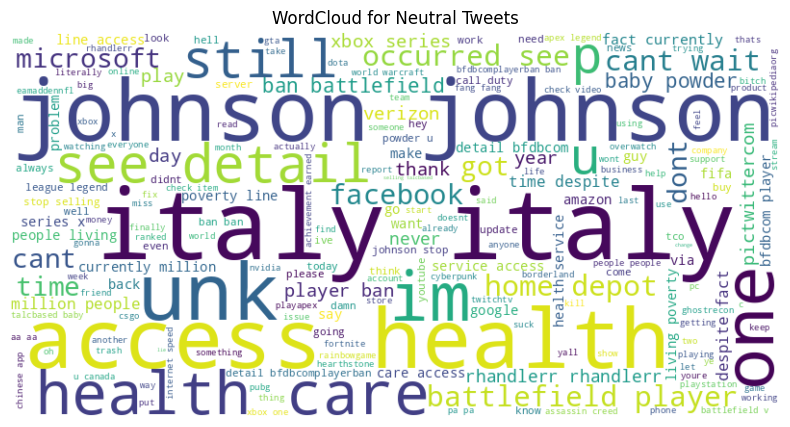

In [35]:
from wordcloud import WordCloud

for sentiment in ["Positive", "Negative", "Neutral"]:
    text = " ".join(df1[df1["sentiment"] == sentiment]["cleaned_text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Tweets")
    plt.show()

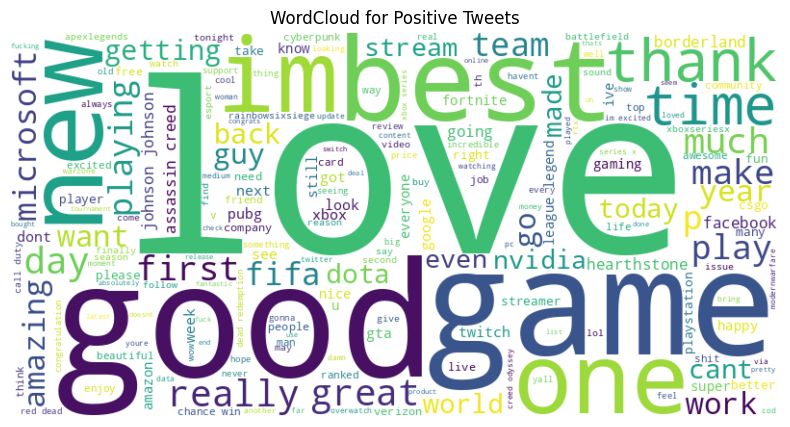

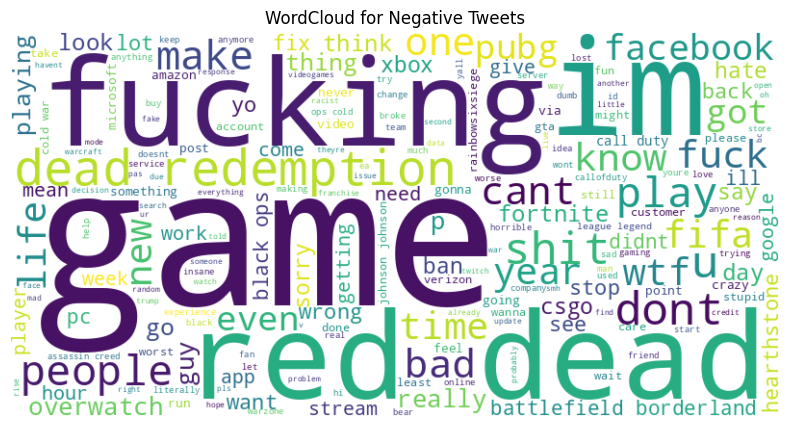

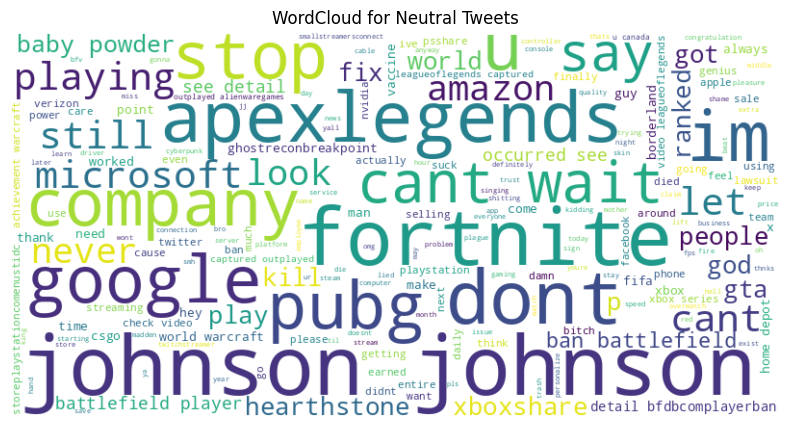

In [34]:
from wordcloud import WordCloud

for sentiment in ["Positive", "Negative", "Neutral"]:
    text = " ".join(df2[df2["sentiment"] == sentiment]["cleaned_text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Tweets")
    plt.show()